bbb# ESPnet2-ASR realtime demonstration

This notebook provides a demonstration of the realtime E2E-ASR using ESPnet2-ASR.

- ESPnet2-ASR: https://github.com/espnet/espnet/tree/master/egs2/TEMPLATE/asr1

Author: Jiatong Shi ([@ftshijt](https://github.com/ftshijt))

In [7]:
# -*- coding: utf-8 -*-
"""espnet2_asr_realtime_demo.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1srSZuZc6eoEkMCfrvCLY4PQsN5J7I8pn

# ESPnet2-ASR realtime demonstration

This notebook provides a demonstration of the realtime E2E-ASR using ESPnet2-ASR.

- ESPnet2-ASR: https://github.com/espnet/espnet/tree/master/egs2/TEMPLATE/asr1

Author: Jiatong Shi ([@ftshijt](https://github.com/ftshijt))
"""

# NOTE: pip shows imcompatible errors due to preinstalled libraries but you do not need to care
# !pip install -q espnet==0.9.9
# !pip install -q espnet_model_zoo



'espnet2_asr_realtime_demo.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1srSZuZc6eoEkMCfrvCLY4PQsN5J7I8pn\n\n# ESPnet2-ASR realtime demonstration\n\nThis notebook provides a demonstration of the realtime E2E-ASR using ESPnet2-ASR.\n\n- ESPnet2-ASR: https://github.com/espnet/espnet/tree/master/egs2/TEMPLATE/asr1\n\nAuthor: Jiatong Shi ([@ftshijt](https://github.com/ftshijt))\n'

In [8]:
"""## ASR model demo
### Model Selection

Please select model shown in [espnet_model_zoo](https://github.com/espnet/espnet_model_zoo/blob/master/espnet_model_zoo/table.csv)

In this demonstration, we will show English, Japanese, Spanish, Mandrain, Multilingual ASR model, respectively
"""

lang = 'en'
fs = 16000 #@param {type:"integer"}
tag = 'Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave' #@param ["Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave", "kamo-naoyuki/librispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_bpe5000_scheduler_confwarmup_steps40000_optim_conflr0.0025_sp_valid.acc.ave"] {type:"string"}



In [9]:
"""### Model Setup"""

import time
import torch
import string
from espnet_model_zoo.downloader import ModelDownloader
from espnet2.bin.asr_inference import Speech2Text


d = ModelDownloader()
# It may takes a while to download and build models
speech2text = Speech2Text(
    **d.download_and_unpack(tag),
    device="cpu",
    minlenratio=0.0,
    maxlenratio=0.0,
    ctc_weight=0.3,
    beam_size=10,
    batch_size=0,
    nbest=1
)

def text_normalizer(text):
    text = text.upper()
    return text.translate(str.maketrans('', '', string.punctuation))



In [10]:
"""### Recognize your own pre-recordings

1.   Upload your own pre-recorded recordings
2.   Recognize your voice with the ASR system
"""
from IPython.display import display, Audio
import soundfile
import librosa.display
import matplotlib.pyplot as plt

Input Speech: archive/VCTK-Corpus/VCTK-Corpus/wav48/p228/p228_002.wav


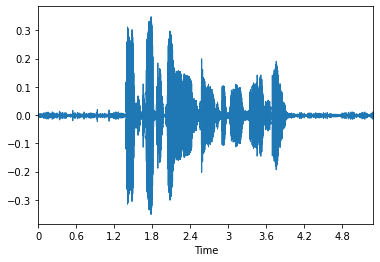

ASR objective: Ask her to bring these things with her from the store
ASR hypothesis: ASSURED TO BRING THESE THINGS WITH HER FROM THE STORE
**************************************************


In [11]:
person = 'p228'
file_name = f'archive/VCTK-Corpus/VCTK-Corpus/wav48/{person}/{person}_002.wav'

speech, rate = librosa.load(file_name, sr=fs)
assert rate == fs, "mismatch in sampling rate"
nbests = speech2text(speech)
text, *_ = nbests[0]

print(f"Input Speech: {file_name}")
display(Audio(speech, rate=rate))
librosa.display.waveplot(speech, sr=rate)
plt.show()
print(f"ASR objective: Ask her to bring these things with her from the store")
print(f"ASR hypothesis: {text_normalizer(text)}")
print("*" * 50)